# The effect of the Swedish amortization requirement on house prices - A descriptive analysis

## Code for data collection

### Import libraries

In [1]:
%matplotlib inline
import pandas as pd
import requests
import re
from IPython.display import HTML
from random import randint
from time import sleep 
import numpy as np
from dateutil.parser import parse
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import Image

### Load data

The website from which I retrieve the data consists of 49 listings on approximately 6919 pages. I start with slicing up the pages to get a list of 49 items on each page. I then define functions to get data on the 10 variables I want. After retrieving data on these 10 variables for one slice, I loop over all slices on each page and make a datadrame of it to make sure I get all information correctly. Last, I loop over all pages, and make sure to put a quite long sleep between all pages.    

In [11]:
url = 'https://www.hemnet.se/salda/bostader?item_types%5B%5D=bostadsratt&page=1&sold_age=all'

In [12]:
print(url)


https://www.hemnet.se/salda/bostader?item_types%5B%5D=bostadsratt&page=1&sold_age=all


In [13]:
page = requests.get(url)  

In [14]:
print(page.headers)

{'Date': 'Fri, 21 Sep 2018 14:27:00 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=d931ab43e7be7ff253c61c00cf8870b3f1537540020; expires=Sat, 21-Sep-19 14:27:00 GMT; path=/; domain=.hemnet.se; HttpOnly, hn_exp_kpis=238; domain=www.hemnet.se; path=/; expires=Sun, 21 Oct 2018 14:27:00 -0000, hn_exp_dfp=257; domain=www.hemnet.se; path=/; expires=Sun, 21 Oct 2018 14:27:00 -0000, hn_exp_tl=893; domain=www.hemnet.se; path=/; expires=Sun, 21 Oct 2018 14:27:00 -0000, hn_exp_aff=77; domain=www.hemnet.se; path=/; expires=Sun, 21 Oct 2018 14:27:00 -0000, hn_exp_srm=577; domain=www.hemnet.se; path=/; expires=Sun, 21 Oct 2018 14:27:00 -0000, results%2Fsold%2Fresults%2Fresult_settings%2Fsorting=sale_date+desc; domain=www.hemnet.se; path=/; expires=Sat, 21 Sep 2019 14:27:00 -0000, results%2Fsold%2Fresults%2Fresult_settings%2Fpreferred_sorting=false; domain=www.hemnet.se; path=/; expires=Sat, 21 Sep 2019 14:27:00 -00

In [15]:
page.status_code

200

In [75]:
page.text;

In [17]:
HTML(page.text);

In [19]:
page_html = page.text
page_html;

First I need to split the webpage into 49 pieces to extract the information for each listing.

In [22]:
slices = page_html.split('<li class="sold-results__normal-hit">') 
slices[1]

'\n          <div class="sold-property-listing">\n  <div class="sold-property-listing__location">\n    <h2 class="sold-property-listing__heading">\n      <span class="property-icon property-icon--result"><svg width="13" height="13" viewBox="0 0 13 13" xmlns="http://www.w3.org/2000/svg"><title>Radhus</title><desc><span class="svg-icon__fallback-text">Radhus</span></desc><path class="svg-icon__shape" d="M6.5 3.25L4.062 0 0 5.417v6.5C0 12.515.485 13 1.083 13H3.25V9.208h1.625V13h3.25V9.208H9.75V13h2.167c.598 0 1.083-.485 1.083-1.083v-6.5L8.937 0 6.5 3.25z" fill="#45A366" fill-rule="evenodd"/></svg>\n</span>\n      <span class="item-result-meta-attribute-is-bold item-link">Lindekullegatan 9</span>\n    </h2>\n\n    <div>\n      <span class="hide-element">\n        Bostadsrätt\n      </span>\n        <span class="item-link">\n          Ingared,\n</span>      \n    </div>\n  </div>\n\n  <div class="sold-property-listing__size">\n      <div class="clear-children">\n        <div class="sold-pro

In [23]:
len(slices)

51

Now I want to get all info in one listing. Below functions get data from the listings.

In [24]:
def get_info(slice):
    try: 
        address = re.findall('class="item-result-meta-attribute-is-bold item-link">(.*?)<', slice)[0]
    except: 
        address = '.'
    
    try:
        area = re.findall('class="item-link">\n          (.*?),', slice)[0]
    except: 
        area = '.'

    try:
        city = re.findall(',\n</span>      (.*?)\n', slice)[0]
    except:
        city = '.'
    
    try: 
        sqm = re.findall('class="sold-property-listing__subheading sold-property-listing--left">\n            (.*?)&', slice)[0]
    except: 
        sqm = '.'
        
    try: 
        rooms = re.findall('&nbsp;\n            (.*?)&', slice)[0]
    except:  
        rooms = '.'
        
    try:
        monthly_fee = re.findall('class="sold-property-listing__fee">\n            (.*?)&', slice)[0].replace('\xa0', '')
    except: 
        monthly_fee = '.'
        
    try:
        final_price = re.findall('class="sold-property-listing__subheading sold-property-listing--left">\n        Slutpris (.*?) kr', slice)[0].replace('\xa0', '')
    except:
        final_price = '.'
        
    try:
        sale_date = re.findall('class="sold-property-listing__sold-date sold-property-listing--left">\n          Såld (.*?)\n', slice)[0]
    except:
        sale_date = '.'
        
    try:
        price_persqm = re.findall('class="sold-property-listing__price-per-m2 sold-property-listing--left">\n          (.*?) kr', slice)[0].replace('\xa0', '')
    except: 
        price_persqm = '.'
        
    try:
        per_change = re.findall('class="sold-property-listing__price-change">\n      (.*?)%\n', slice)[0].replace('\xa0', '')
    except: 
        per_change = '.'
        
    sales_details = {'address': address,
                     'area': area,
                     'city': city,
                     'sqm': sqm,
                     'rooms': rooms,
                     'monthly_fee': monthly_fee,
                     'final_price': final_price,
                     'sale_date': sale_date,
                     'price_persqm': price_persqm,
                     'per_change': per_change}
                     
    return sales_details    

In [25]:
get_info(slices[2])

{'address': 'Lindekullegatan',
 'area': 'Ingared',
 'city': '',
 'sqm': '110',
 'rooms': '5',
 'monthly_fee': '4713',
 'final_price': '2545000',
 'sale_date': '21 september 2018',
 'price_persqm': '.',
 'per_change': '.'}

The functions seem to work for one slice, lets do all slices in one page and put them in a dataframe.

In [26]:
directory_page = []

for slice in slices:
    try:
        info = get_info(slice)
        directory_page.append(info)
    except:
        print('problem')

In [27]:
directory_page;

In [28]:
len(directory_page)

51

In [30]:
page_df = pd.DataFrame(directory_page)
page_df

,address,area,city,final_price,monthly_fee,per_change,price_persqm,rooms,sale_date,sqm
0,.,.,.,.,.,.,.,.,.,.
1,Lindekullegatan 9,Ingared,,2545000,4713,.,.,5,21 september 2018,110
2,Lindekullegatan,Ingared,,2545000,4713,.,.,5,21 september 2018,110
3,Lindekullegatan 6,Ingared,,2545000,4713,.,.,5,21 september 2018,110
4,Lindekullegatan,Ingared,,2595000,4713,.,.,5,21 september 2018,110
5,Lindekullegatan 2,Ingared,,2495000,4713,.,.,5,21 september 2018,110
6,Lindekullegatan,Ingared,,2595000,4713,.,.,5,21 september 2018,110
7,Bäckvägen 68B,Midsommarkransen/Telefonplan,Stockholm,2260000,2600,+13,62778,1,21 september 2018,36
8,"Långholmsgatan 19, 4tr / Borgargatan 12",Högalid,Stockholm,5950000,3762,+20,72561,"3,5",21 september 2018,82
9,Linnévägen 11C,Oppeby,Nyköping,2080000,5000,+12,20594,4,21 september 2018,101


For some listings I do not have the name of the city. This is because in some cases it is not stated and in some cases the city is stated instead of the area. Normally, the listings state area and city in this format "area, city". To identify the city I have written the code starting with a comma-sign. If I do not, it cannot find the city. But in the instances where there are no area and no comma-sign in front of the city, I cannot find the city. 

Now let's loop over all pages.

In [20]:
base_url = 'https://www.hemnet.se/salda/bostader?item_types%5B%5D=bostadsratt&page='
last = '&sold_age=all'

In [21]:
print(base_url + str(2) + last) # An example to see that I get the page number correctly 

https://www.hemnet.se/salda/bostader?item_types%5B%5D=bostadsratt&page=2&sold_age=all


In [ ]:
directory_all = []

for i in range(1,6920):
    try: 
        url = base_url + str(i) + last
        page = requests.get(url) 
        page_html = page.text
        slices = page_html.split('<li class="sold-results__normal-hit">')
    except: 
        print(i)
    
    for slice in slices:
        try:
            info = get_info(slice)
            directory_all.append(info)
        except:
            print('problem')
        
    sleep(randint(4,6))
    print(i)

In [28]:
len(directory_all)

350863

In [ ]:
Allinfo_df = pd.DataFrame(directory_all)
Allinfo_df;

In [30]:
Allinfo_df.to_csv('All_info.csv', index=True)

At first, I just downloaded data on co-operative apartments since the ads for those where identical. However, I realized that it could be interesting to also look at price effects on villas, and compare them to the price effects on appartments. Hence, I will collect the exact same information for villas below. I understand that it is not the most optimal way to do this in two steps. To separate the two types of properties I add a column indicating if the ad is a villa (Y) or not (N).  

In [33]:
# To make sure I get all the adds I reimport the data from the csv-file I created above

Allinfo_df = pd.read_csv('All_info.csv', index_col=False)

In [34]:
del Allinfo_df['Unnamed: 0']
Allinfo_df;

In [35]:
Allinfo_df = Allinfo_df.assign(Villa = 'N')
Allinfo_df;

Let's do the exact same thing as before but download data for villas as well. Then I can append the result to the dataframe above. 

In [20]:
base_url_villa = 'https://www.hemnet.se/salda/bostader?item_types%5B%5D=villa&page='
last_villa = '&sold_age=all'

In [163]:
print(base_url_villa + str(2) + last_villa) # An example to see that I get the page number correctly 

https://www.hemnet.se/salda/bostader?item_types%5B%5D=villa&page=2&sold_age=all


In [ ]:
directory_all_villa = []

for i in range(1,3144):
    try: 
        url_villa = base_url_villa + str(i) + last_villa
        page_villa = requests.get(url_villa) 
        page_html_villa = page_villa.text
        slices_villa = page_html_villa.split('<li class="sold-results__normal-hit">')
    except: 
        print(i)
    
    for slice in slices_villa:
        try:
            info = get_info(slice)
            directory_all_villa.append(info)
        except:
            print('problem')
        
    sleep(randint(5,8))
    print(i)

In [168]:
len(directory_all_villa)

158853

In [ ]:
Allinfo_df_villa = pd.DataFrame(directory_all_villa)
Allinfo_df_villa;

In [ ]:
Allinfo_df_villa.to_csv('All_info_villa.csv')

In [41]:
Allinfo_df_villa = pd.read_csv('All_info_villa.csv', index_col=False)
Allinfo_df_villa;

In [42]:
del Allinfo_df_villa['Unnamed: 0']
Allinfo_df_villa;

In [43]:
Allinfo_df_villa = Allinfo_df_villa.assign(Villa = 'Y')
Allinfo_df_villa;

In [45]:
Bothappvillainfo_df = Allinfo_df.append(Allinfo_df_villa, ignore_index=True) 
Bothappvillainfo_df;

In [46]:
len(Bothappvillainfo_df)

509716

For each page, the first listing is empty. This is due to the reference point I made to slice the page. Therefore I will delete the empty listings. 

In [47]:
data = Bothappvillainfo_df[Bothappvillainfo_df['address']!='.'].reset_index().drop('index', axis=1)
data;

So now I have the data I need. Let's move on to the analysis. 

## Descriptive analysis of the new data

Since the number of variables is limited, I do a descriptive analysis based on the data I have. I divide the data into subgroups based on city and type of property and simply plot the sale prices between 2014-2018. I want to see if there are trend breaks in sale prices comparing the period before and after the implementation of the amortization requirement on June 1st 2016. I also want to see of the percentage increase in sale price from the asked price is effected or not. Of course, we cannot say whether the possible trend break is due to the amortization requirement since I do not control for anything else. In addition, the number of years after the requirement was implemented is few so we can only get a general picture of the price development. Since I have many listings on one date, I need to make an average for each date.    

### Create date variable

In [26]:
data.dtypes

address         object
area            object
city            object
final_price     object
monthly_fee     object
per_change      object
price_persqm    object
rooms           object
sale_date       object
sqm             object
Villa           object
dtype: object

In [48]:
data['Date_sale'] = pd.Series(data['sale_date']).str.replace('januari', 'january').str.replace('februari', 'february').str.replace('mars', 'march').str.replace('april', 'april').str.replace('maj', 'may').str.replace('juni', 'june').str.replace('juli', 'july').str.replace('augusti', 'august').str.replace('september', 'september').str.replace('oktober', 'october').str.replace('november', 'november').str.replace('december', 'december')
data;

# Have to change the name of the months to english 

In [49]:
del data['sale_date'];

In [50]:
data['Date'] = pd.to_datetime(data['Date_sale'], format='%d %B %Y');

In [51]:
data.dtypes

address                 object
area                    object
city                    object
final_price             object
monthly_fee             object
per_change              object
price_persqm            object
rooms                   object
sqm                     object
Villa                   object
Date_sale               object
Date            datetime64[ns]
dtype: object

I will drop the observations before 2014 since the data is limited then. 

In [52]:
data['year'], data['month'], data['day'] = data['Date'].dt.year, data['Date'].dt.month, data['Date'].dt.day
data;

In [53]:
data2 = data[data['year'] > 2013]  
len(data2)

445150

In [54]:
data2 = data2.sort_values(by='Date')

In [55]:
data2.dtypes

address                 object
area                    object
city                    object
final_price             object
monthly_fee             object
per_change              object
price_persqm            object
rooms                   object
sqm                     object
Villa                   object
Date_sale               object
Date            datetime64[ns]
year                     int64
month                    int64
day                      int64
dtype: object

In [56]:
data2 = data2.reset_index(drop=True)
data2

,address,area,city,final_price,monthly_fee,per_change,price_persqm,rooms,sqm,Villa,Date_sale,Date,year,month,day
0,Allévägen 7,Nykvarn-Furuborg,Nykvarn,3500000,.,-9,.,6,107,Y,1 january 2014,2014-01-01,2014,1,1
1,Gustav III:s Boulevard 93,Frösunda/Solna,Stockholm,2700000,4376,+8,35526,2,76,N,1 january 2014,2014-01-01,2014,1,1
2,"Fyrgränd 4, 4tr",Haga Norra,Stockholm,2020000,1759,+13,38846,2,52,N,1 january 2014,2014-01-01,2014,1,1
3,Stybbvägen 4C,Skutskär,Skutskär,200000,2986,.,3333,2,60,N,1 january 2014,2014-01-01,2014,1,1
4,Huldregatan 12 c,Sjöbo,Borås,260000,3105,+33,5909,"1,5",44,N,1 january 2014,2014-01-01,2014,1,1
5,Hasselstigen 2,Råsunda,Stockholm,2400000,3290,.,40678,2,59,N,1 january 2014,2014-01-01,2014,1,1
6,"Hagavägen 16, 3 tr",Haga Norra,Stockholm,2100000,3480,+5,38889,2,54,N,1 january 2014,2014-01-01,2014,1,1
7,Lönnstigen 10,Veddige,Veddige,2500000,.,.,.,9,219,Y,1 january 2014,2014-01-01,2014,1,1
8,"Kavallerigatan 29, lgh nr 1002",Centralt,Upplands Väsby,1400000,2308,+8,22222,2,63,N,1 january 2014,2014-01-01,2014,1,1
9,Hedetorpet 36,Öresjö Hedetorpet,NaN,2500000,.,-9,.,3,74,Y,1 january 2014,2014-01-01,2014,1,1


In [36]:
data2.to_csv('data_hemnet.csv', index=True)

In [57]:
data2 = pd.read_csv('data_hemnet.csv', index_col=False)
data2;

In [58]:
del data2['Unnamed: 0'];

### Numerical variables to integers or float

In [59]:
data2['final_price'] = data2['final_price'].astype(str).astype(int);

In [60]:
data2['monthly_fee'] = data2['monthly_fee'].replace('.','0');
data2['price_persqm'] = data2['price_persqm'].replace('.','0');
data2['rooms'] = data2['rooms'].replace('.','0');

In [61]:
data2['monthly_fee'] = data2['monthly_fee'].astype(str).astype(int);

In [62]:
data2['price_persqm'] = data2['price_persqm'].astype(str).astype(int);

In [63]:
data2['rooms'] = pd.Series(data2['rooms']);

In [64]:
data2['rooms'] = data2['rooms'].str.replace(',','.');

In [65]:
data2['rooms'] = pd.to_numeric(data2['rooms'], errors='coerce');

In [66]:
data2['sqm'] = pd.Series(data2['sqm']);

In [67]:
data2['sqm'] = data2['sqm'].str.replace(',','.');

In [68]:
data2['sqm'] = pd.to_numeric(data2['sqm'], errors='coerce');

In [69]:
data2.dtypes

address          object
area             object
city             object
final_price       int32
monthly_fee       int32
per_change       object
price_persqm      int32
rooms           float64
sqm             float64
Villa            object
Date_sale        object
Date             object
year              int64
month             int64
day               int64
dtype: object

In [70]:
#The Date variable is no longer datetime-format after importing the data again. 

In [71]:
data2['Date'] = pd.to_datetime(data2['Date'], format='%Y %m %d');

In [72]:
data2.dtypes

address                 object
area                    object
city                    object
final_price              int32
monthly_fee              int32
per_change              object
price_persqm             int32
rooms                  float64
sqm                    float64
Villa                   object
Date_sale               object
Date            datetime64[ns]
year                     int64
month                    int64
day                      int64
dtype: object

### Findings for annual data

Now I need to make an average of the final price for each month. I have been struggling with the date-variable and to groupby over year and month so I will start with studying the annual development of the final sale price.

In [73]:
Av_final_price = pd.DataFrame(data2.groupby(['year'])['final_price'].mean())
Av_final_price = Av_final_price.reset_index()
Av_final_price

,year,final_price
0,2014,1.983142e+06
1,2015,2.260377e+06
2,2016,2.487075e+06
3,2017,2.640769e+06
4,2018,2.520656e+06


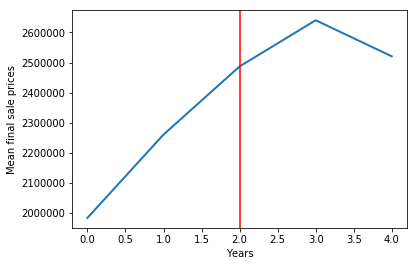

In [74]:
test = plt.plot(Av_final_price.index, Av_final_price['final_price'], linewidth=2.0)
test = plt.ylabel('Mean final sale prices')
test = plt.xlabel('Years')
test = plt.axvline(x=2, color ='red') 

As seen above there seems, with emphasis on seems, to be some trend break after 2017. The amortization requirement was implemented on June 1 2016 (marked with a red verticle line), and it is reasonable that we do not see an effect directly. However, I only have data running two years after the requirement was implemented so I cannot for sure say whether it is a trend break or not. 

I have been struggling with grouping the data on a month-year level, which I am interested in. So moving on, I'll make the plots in Stata, until I've learned matplotlib. 

### Findings for monthly data

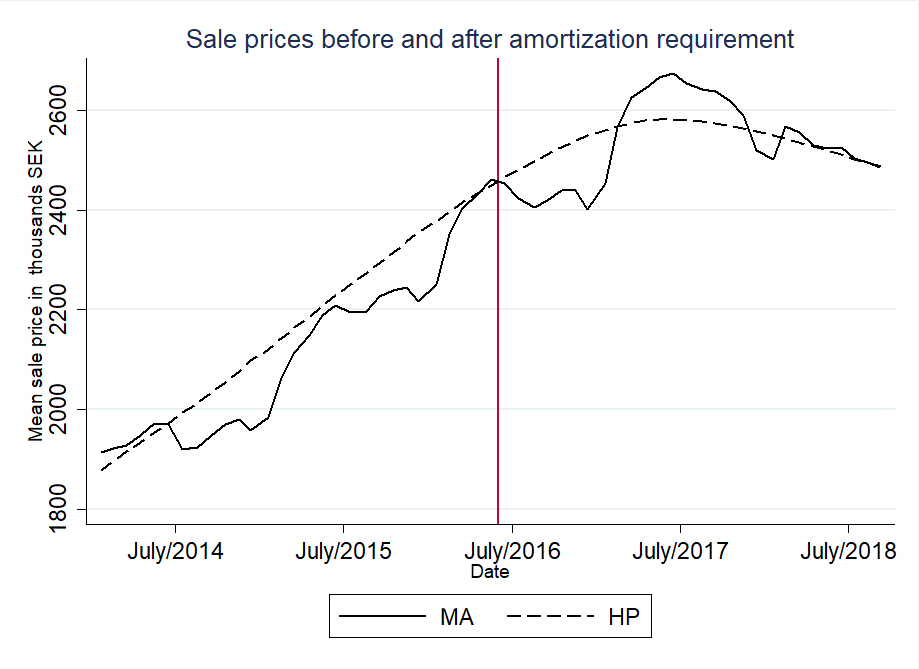

In [8]:
Image(filename='Saleprice_monthyear.png', width=600, height=600)

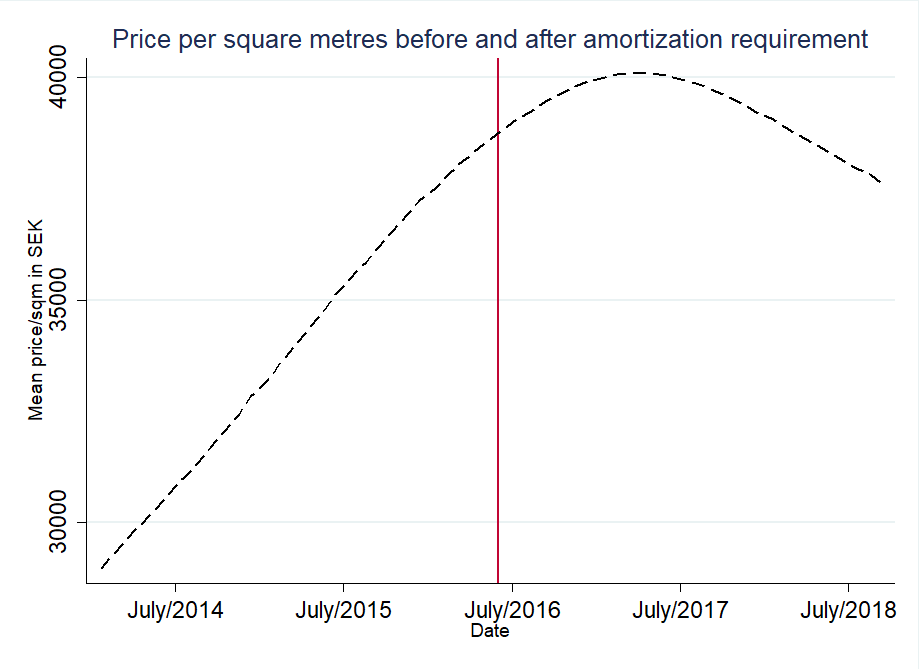

In [9]:
Image(filename='Saleprice_monthyear_persqm.png', width=600, height=600)

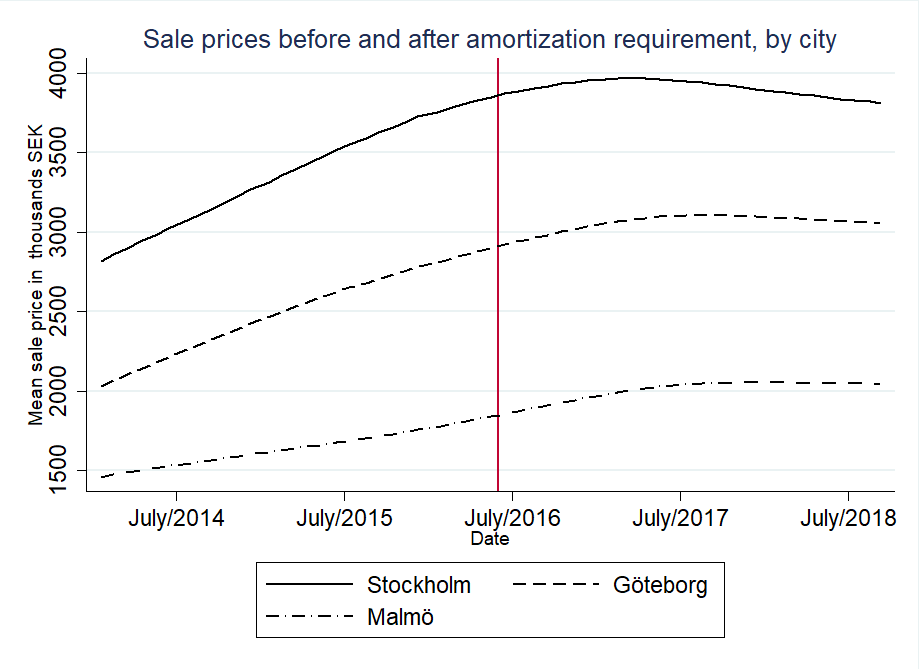

In [10]:
Image(filename='Saleprice_monthyear_cities.png', width=600, height=600)

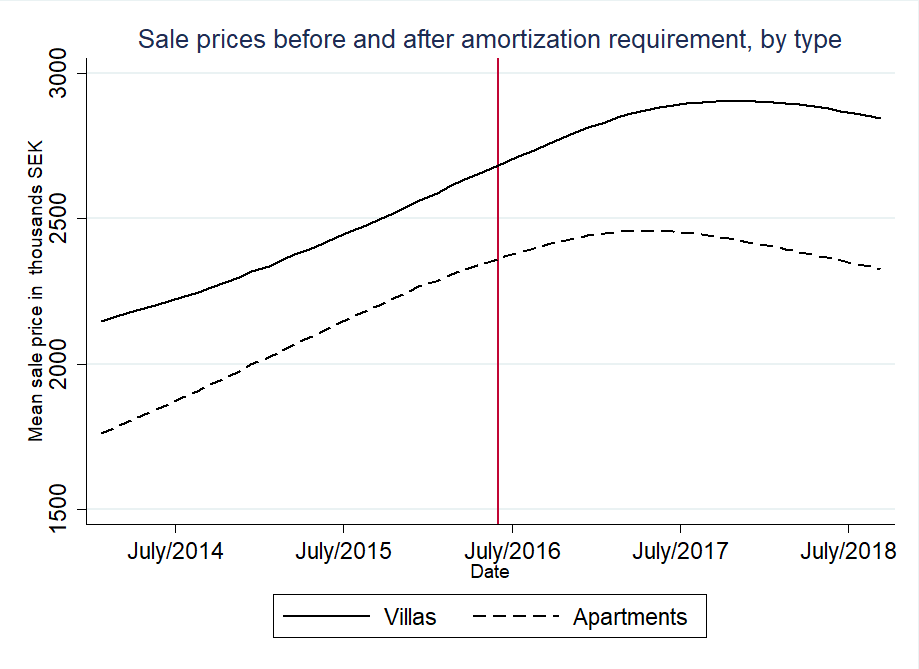

In [11]:
Image(filename='Saleprice_monthyear_villa.png', width=600, height=600)

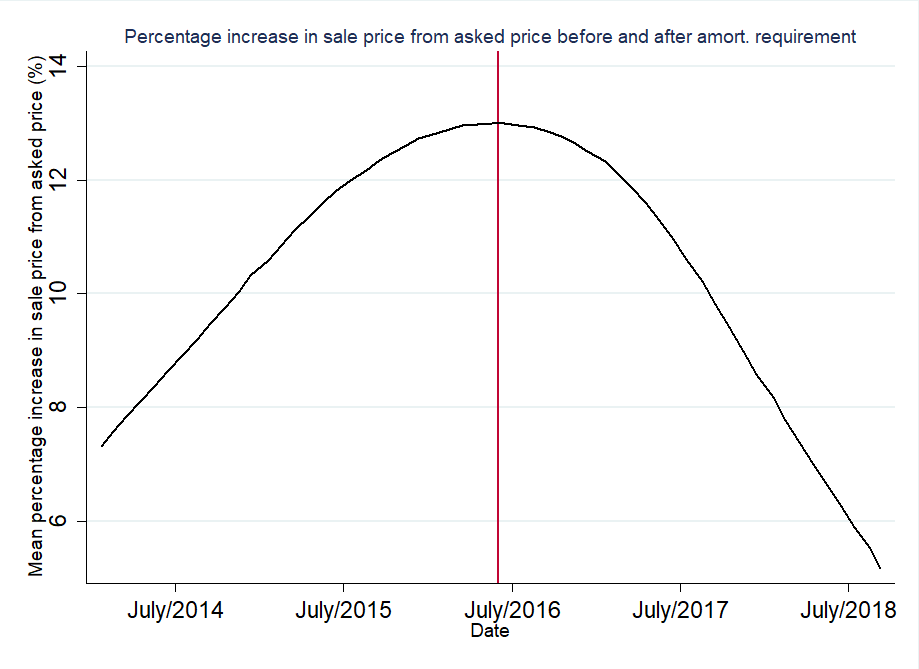

In [12]:
Image(filename='Saleprice_monthyear_change.png', width=600, height=600)